In [1]:
%cd ~/REVIVAL2

/disk2/fli/REVIVAL2


In [2]:
%load_ext blackcellmagic

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
from REVIVAL.util import get_file_name

/disk2/fli/miniconda3/envs/REVIVAL/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [5]:
lib_order = [
    "PfTrpB-7iodo",
    "PfTrpB-7methyl",
    "PfTrpB-7bromo",
    "PfTrpB-5iodo",
    "PfTrpB-5bromo",
    "PfTrpB-5chloro",
    "PfTrpB-4bromo",
    "PfTrpB-6chloro",
    "PfTrpB-5cyano",
    "PfTrpB-4cyano",
    "PfTrpB-56chloro",
    "Rma-CB",
    "Rma-CSi",
    "ParLQ-a",
    "ParLQ-b",
    "ParLQ-c",
    "ParLQ-d",
    "ParLQ-e",
    "ParLQ-f",
    "ParLQ-g",
    "ParLQ-h",
    "ParLQ-i",
]

In [17]:
from glob import glob

# clean mlp columns and index

for f in glob("/disk2/fli/REVIVAL2/zs/lincomb_af3/*.csv"):
    df = pd.read_csv(f, index_col=0)
    df = df.rename(columns=lambda x: get_file_name(x)).reset_index(drop=True).rename(columns={"ParLQ": "ParLQ-a"})
    df["index"] = df.columns
    df = df.rename(columns={"index": ""}).set_index("")
    df.to_csv(f)

In [16]:

FINAL_COL_ORDER = [
    "Library",
    "Hamming distance",
    "EVmutation",
    "ESM2",
    "ESM-IF",
    "CoVES",
    r"ΔΔ$G_f$",  # "ΔΔG",
    "Vina",
    "GALigandDock",
    "AF3",
    "Chai-1",
    "LigandMPNN",
    "FlowSite",
    "Bond distance",
    "Hydrogen bonds",
    "Hydrophobicity",
    "Active-site volume",
]

In [18]:
from REVIVAL.util import get_file_name, checkNgen_folder

In [85]:
# take mean for each row
pd.read_csv("/disk2/fli/REVIVAL2/zs/lincomb/lin_rho_pairwise_df_EVmutation_AF3.csv",index_col=0).mean(axis=1).sort_values(ascending=False)

Rma-CB             0.391732
PfTrpB-4cyano      0.375576
ParLQ-f            0.360815
PfTrpB-7bromo      0.360533
PfTrpB-7methyl     0.357738
PfTrpB-7iodo       0.353302
PfTrpB-6chloro     0.352761
Rma-CSi            0.352646
PfTrpB-5bromo      0.351144
PfTrpB-5chloro     0.344170
PfTrpB-5iodo       0.338215
ParLQ-g            0.337526
PfTrpB-4bromo      0.337259
PfTrpB-5cyano      0.334995
PfTrpB-56chloro    0.306232
ParLQ-c            0.285383
ParLQ-e            0.285361
ParLQ-d            0.263986
ParLQ-h            0.226372
ParLQ-b            0.169095
ParLQ              0.089417
ParLQ-i            0.049516
dtype: float64

In [6]:
%load_ext autoreload
%autoreload 2

In [9]:
from REVIVAL.analysis import process_and_plot_corr
from glob import glob

In [21]:
# Constants
V_MIN, V_MAX = -0.25, 0.55  # Colorbar limits

for f in sorted(glob("/disk2/fli/REVIVAL2/zs/mlpcomb/*.csv")):
    process_and_plot_corr(file_path=f, lib_order=lib_order, output_dir="figs/mlpcomb", vmin=V_MIN, vmax=V_MAX)


In [16]:
# Constants
V_MIN, V_MAX = -0.25, 0.55  # Colorbar limits

for f in sorted(glob("/disk2/fli/REVIVAL2/zs/mlpcomb_af3/*.csv")):
    process_and_plot_corr(file_path=f, lib_order=lib_order, output_dir="figs/mlpcomb_af3", vmin=V_MIN, vmax=V_MAX)


Making figs/mlpcomb_af3 ...


In [19]:
# Constants
V_MIN, V_MAX = -0.25, 0.55  # Colorbar limits

for f in sorted(glob("/disk2/fli/REVIVAL2/zs/lincomb_af3/*.csv")):
    process_and_plot_corr(file_path=f, lib_order=lib_order, output_dir="figs/lincomb_af3", vmin=V_MIN, vmax=V_MAX)


In [22]:
# Constants
V_MIN, V_MAX = -0.25, 0.55  # Colorbar limits

for f in sorted(glob("/disk2/fli/REVIVAL2/zs/lincomb/*.csv")):
    process_and_plot_corr(file_path=f, lib_order=lib_order, output_dir="figs/lincomb", vmin=V_MIN, vmax=V_MAX)


In [11]:
0.4+0.4+0.6+0.2

1.5999999999999999

In [12]:
0.3+0.4+0.6+0.3

1.5999999999999999

In [20]:
0.5+0.4+0.4+0.3

1.6

In [ ]:
# /disk2/fli/REVIVAL2/zs/lincomb/lin_params_EVmutation_AF3.npz

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def compute_and_plot_weights(lib_order, col_names, weight_file):
    """
    Compute and normalize weights for different library categories and plot bar charts.

    Args:
        lib_order (list): List of library names.
        final_col_order (list): Feature column names.
        weight_file (str): Path to the .npz file containing model weights.

    Returns:
        dict: Dictionary containing the aggregated and normalized weights.
    """

    if "lib" in col_names or "Library" in col_names:
        weight_len = len(col_names) - 1
        # take out that column
        col_names.remove("lib")
    else:
        weight_len = len(col_names)
    
    # Initialize weight storage
    weight_dict = {
        "all": np.zeros((weight_len, 1)),
        "PfTrpB": np.zeros((weight_len, 1)),
        "Rma-CB": np.zeros((weight_len, 1)),
        "Rma-CSi": np.zeros((weight_len, 1)),
        "ParLQ": np.zeros((weight_len, 1))
    }

    # intercetp dict
    intercept_dict = {
        "all": 0,
        "PfTrpB": 0,
        "Rma-CB": 0,
        "Rma-CSi": 0,
        "ParLQ": 0
    }

    # Initialize counts
    count_dict = {key: 0 for key in weight_dict.keys()}

    # Process each library
    for lib in lib_order:
        lib_key = "ParLQ" if lib == "ParLQ-a" else lib  # Normalize naming
        weight_data = np.load(weight_file, allow_pickle=True)[f"train_fold_{lib_key}_test_fold_{lib_key}"]
        intercept, weights = weight_data  # Unpack weights
        
        # Check if weights have the expected shape
        if weights.shape[0] != weight_len:
            print(f"Warning: {lib_key} has unexpected weight shape {weights.shape}, skipping.")
            continue  # Skip libraries with mismatched weights

        reshaped_weights = weights.reshape(-1, 1)

        # Aggregate weights
        weight_dict["all"] += reshaped_weights
        count_dict["all"] += 1

        intercept_dict["all"] += intercept

        for key in ["PfTrpB", "Rma-CB", "Rma-CSi", "ParLQ"]:
            if key in lib:
                weight_dict[key] += reshaped_weights
                count_dict[key] += 1
                intercept_dict[key] += intercept

        # Plot weights for each library
        plt.figure(figsize=(4, 3))
        plt.bar(range(len(weights)), weights)
        plt.title(f"Weights for {lib_key}")
        plt.xticks(range(len(weights)), col_names, rotation=90)
        plt.show()

    # Normalize weights by count
    for key in weight_dict:
        if count_dict[key] > 0:  # Avoid division by zero
            weight_dict[key] /= count_dict[key]

    # Normalize intercepts
    for key in intercept_dict:
        if count_dict[key] > 0:  # Avoid division by zero
            intercept_dict[key] /= count_dict[key]

    return weight_dict, intercept_dict

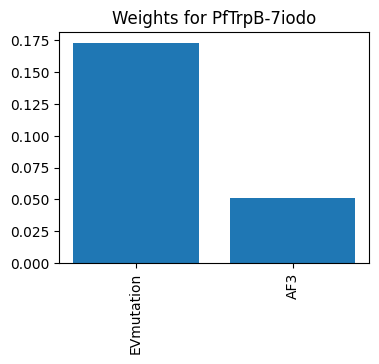

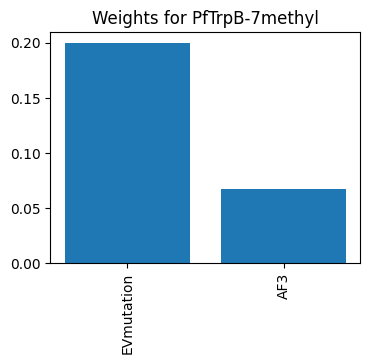

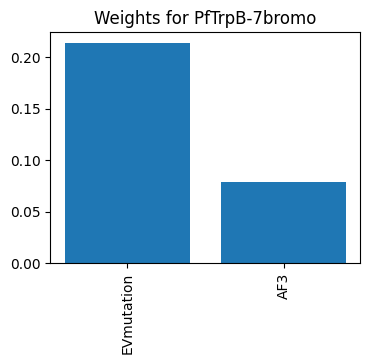

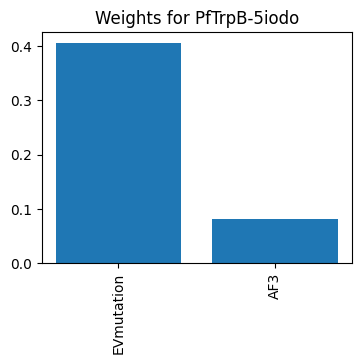

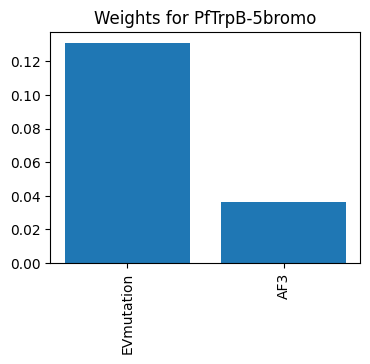

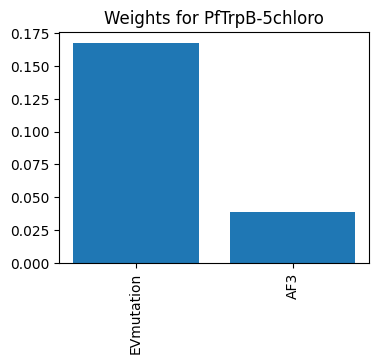

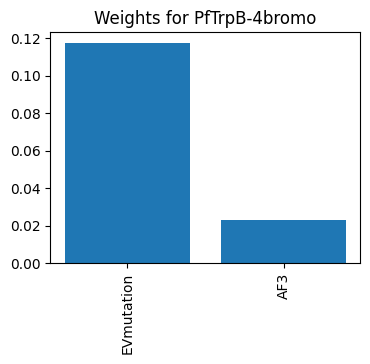

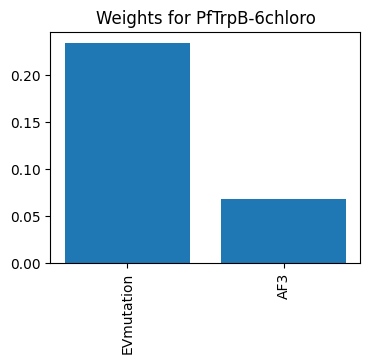

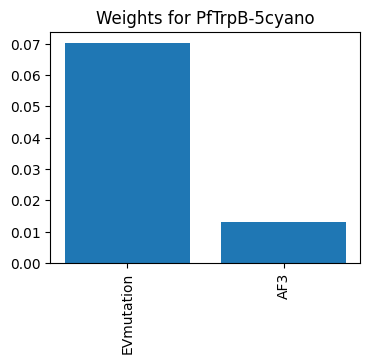

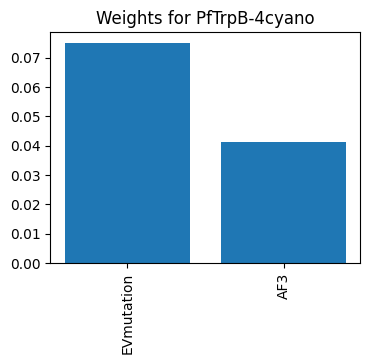

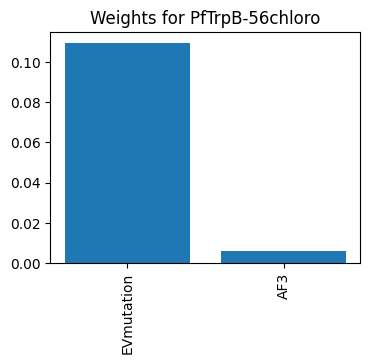

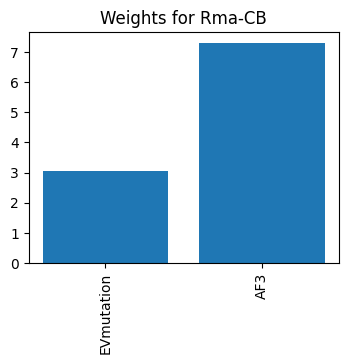

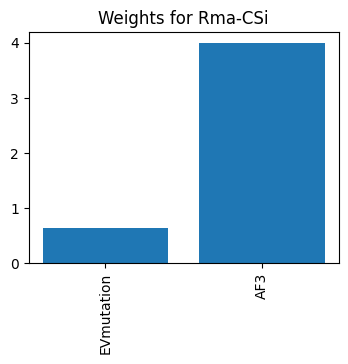

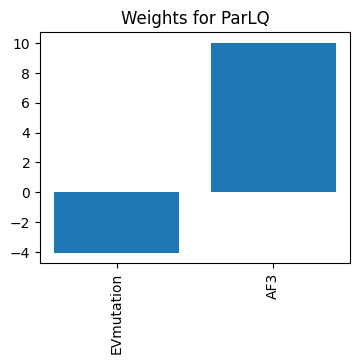

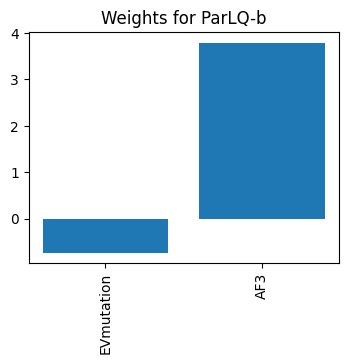

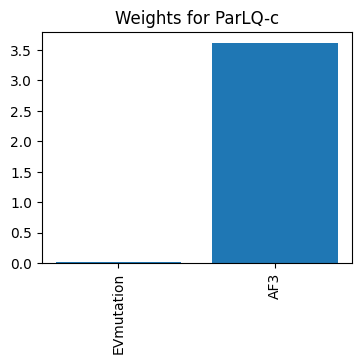

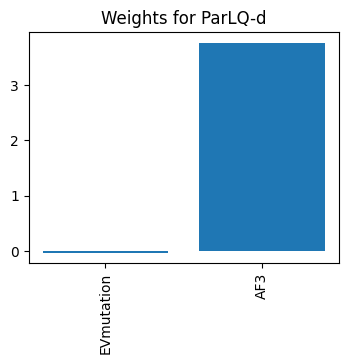

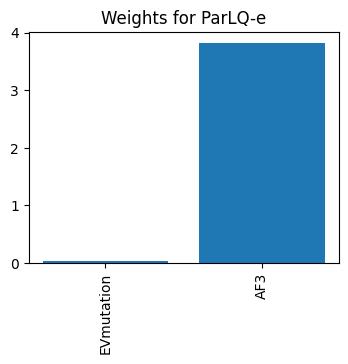

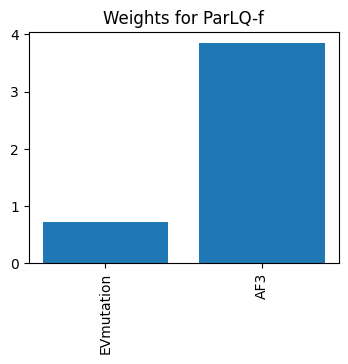

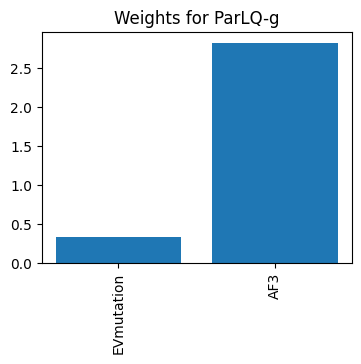

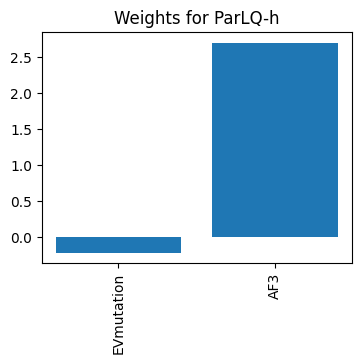

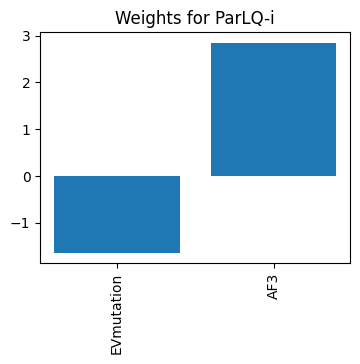

In [72]:
weight_dict, intercept_dict = compute_and_plot_weights(lib_order, ["EVmutation", "AF3"], "/disk2/fli/REVIVAL2/zs/lincomb/lin_params_EVmutation_AF3.npz")


In [74]:
weight_dict, intercept_dict

({'all': array([[1.60764523e-03],
         [2.22840183e+00]]),
  'PfTrpB': array([[0.17239295],
         [0.04584786]]),
  'Rma-CB': array([[3.04100865],
         [7.29187456]]),
  'Rma-CSi': array([[0.64446085],
         [3.99222449]]),
  'ParLQ': array([[-0.6162693 ],
         [ 4.13737941]])},
 {'all': 16.80256478720124,
  'PfTrpB': 0.2573863682537973,
  'Rma-CB': 65.7888888888889,
  'Rma-CSi': 24.930000000000003,
  'ParLQ': 30.678476264305182})

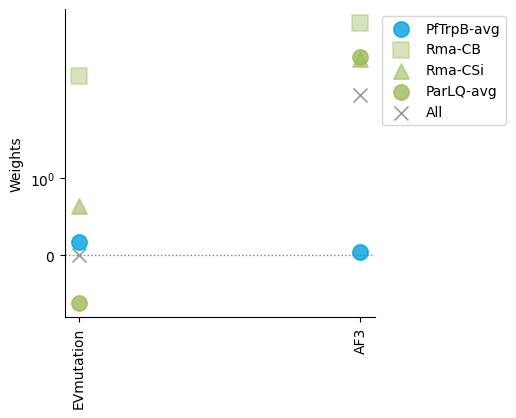

In [75]:
# Create the scatter plot
plt.figure(figsize=(4,4))
plt.yscale('symlog')
# add a thin gray line at y=0 and make it to the back
plt.axhline(0, color='gray', linewidth=1, ls="dotted", zorder=-1)

x_values = np.arange(1, 3)
plt.scatter(x_values, weight_dict["PfTrpB"], color='#00a1df', label='PfTrpB-avg', marker='o', s=120, alpha=0.8, linewidths=1.2)
plt.scatter(x_values, weight_dict["Rma-CB"], color='#9bbb59', label='Rma-CB', marker='s', s=120, alpha=0.4, linewidths=1.2)
plt.scatter(x_values, weight_dict["Rma-CSi"], color='#9bbb59', label='Rma-CSi', marker='^', s=120, alpha=0.6, linewidths=1.2)
plt.scatter(x_values, weight_dict["ParLQ"], color='#9bbb59', label='ParLQ-avg', marker='o', s=120, alpha=0.8, linewidths=1.2)
plt.scatter(x_values, weight_dict["all"], color="gray", label='All', marker='x', s=100, alpha=0.8, linewidths=1.2) # yellow

plt.xticks(x_values, ["EVmutation", "AF3"], rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# make y semilog

plt.ylabel('Weights')
# remove top and right spines
sns.despine()
# save
plt.show()


In [26]:
# use given weights to predict all

def inference_linear_model(X, w_0, w):
    y = np.dot(X, w) + w_0
    return y

In [24]:
from scipy.stats import spearmanr

from sklearn.preprocessing import StandardScaler

In [80]:
weighted_res = []

for f in sorted(glob("/disk2/fli/REVIVAL2/zs/comb/minimal/*.csv")):
    df = pd.read_csv(f)

    X = df[["EVmutation", "AF3"]].to_numpy()
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    y = df["fitness"].to_numpy()

    y_all = inference_linear_model(X, intercept_dict["all"], weight_dict["all"][:])
    y_pf = inference_linear_model(X, intercept_dict["PfTrpB"], weight_dict["PfTrpB"][:])
    y_cb = inference_linear_model(X, intercept_dict["Rma-CB"], weight_dict["Rma-CB"][:])
    y_csi = inference_linear_model(X, intercept_dict["Rma-CSi"], weight_dict["Rma-CSi"][:])
    y_par = inference_linear_model(X, intercept_dict["ParLQ"], weight_dict["ParLQ"][:])

    file_name = get_file_name(f)
    if file_name == "ParLQ":
        file_name = "ParLQ-a"
    # calc rho
    weighted_res.append(
            {
            "Library": file_name,
            "All": spearmanr(y, y_all)[0],
            "PfTrpB": spearmanr(y, y_pf)[0],
            "Rma-CB": spearmanr(y, y_cb)[0],
            "Rma-CSi": spearmanr(y, y_csi)[0],
            "ParLQ": spearmanr(y, y_par)[0],
        }
    )

In [81]:
pd.DataFrame(weighted_res).set_index("Library").reindex(lib_order)

,All,PfTrpB,Rma-CB,Rma-CSi,ParLQ
Library,,,,,
PfTrpB-7iodo,0.344972,0.538553,0.579180,0.506087,0.089936
PfTrpB-7methyl,0.267077,0.536149,0.455790,0.368164,0.103698
PfTrpB-7bromo,0.280452,0.588884,0.531702,0.425163,0.041302
PfTrpB-5iodo,0.246430,0.467200,0.470374,0.381201,0.093221
PfTrpB-5bromo,0.250905,0.524162,0.497516,0.374843,0.098619
PfTrpB-5chloro,0.254620,0.576080,0.509023,0.372729,0.112819
PfTrpB-4bromo,0.211940,0.499833,0.503819,0.425071,0.005934
PfTrpB-6chloro,0.291061,0.625643,0.577720,0.452291,0.120179
PfTrpB-5cyano,0.257226,0.424314,0.439773,0.370275,0.072088


In [86]:
pd.DataFrame(weighted_res).set_index("Library").reindex(lib_order).mean()

All        0.285248
PfTrpB     0.349755
Rma-CB     0.391732
Rma-CSi    0.352646
ParLQ      0.189965
dtype: float64

In [ ]:
# directly use Rma CB weights and intercept to predict all

In [28]:
chosen_lib = "Rma-CB"
intercept, weights = np.load("/disk2/fli/REVIVAL2/zs/lincomb/lin_params_EVmutation_AF3.npz", allow_pickle=True)[f"train_fold_{chosen_lib}_test_fold_{chosen_lib}"]

In [29]:
intercept, weights

(65.7888888888889, array([3.04100865, 7.29187456]))

In [30]:
from REVIVAL.analysis import calc_top_n_percent_recall

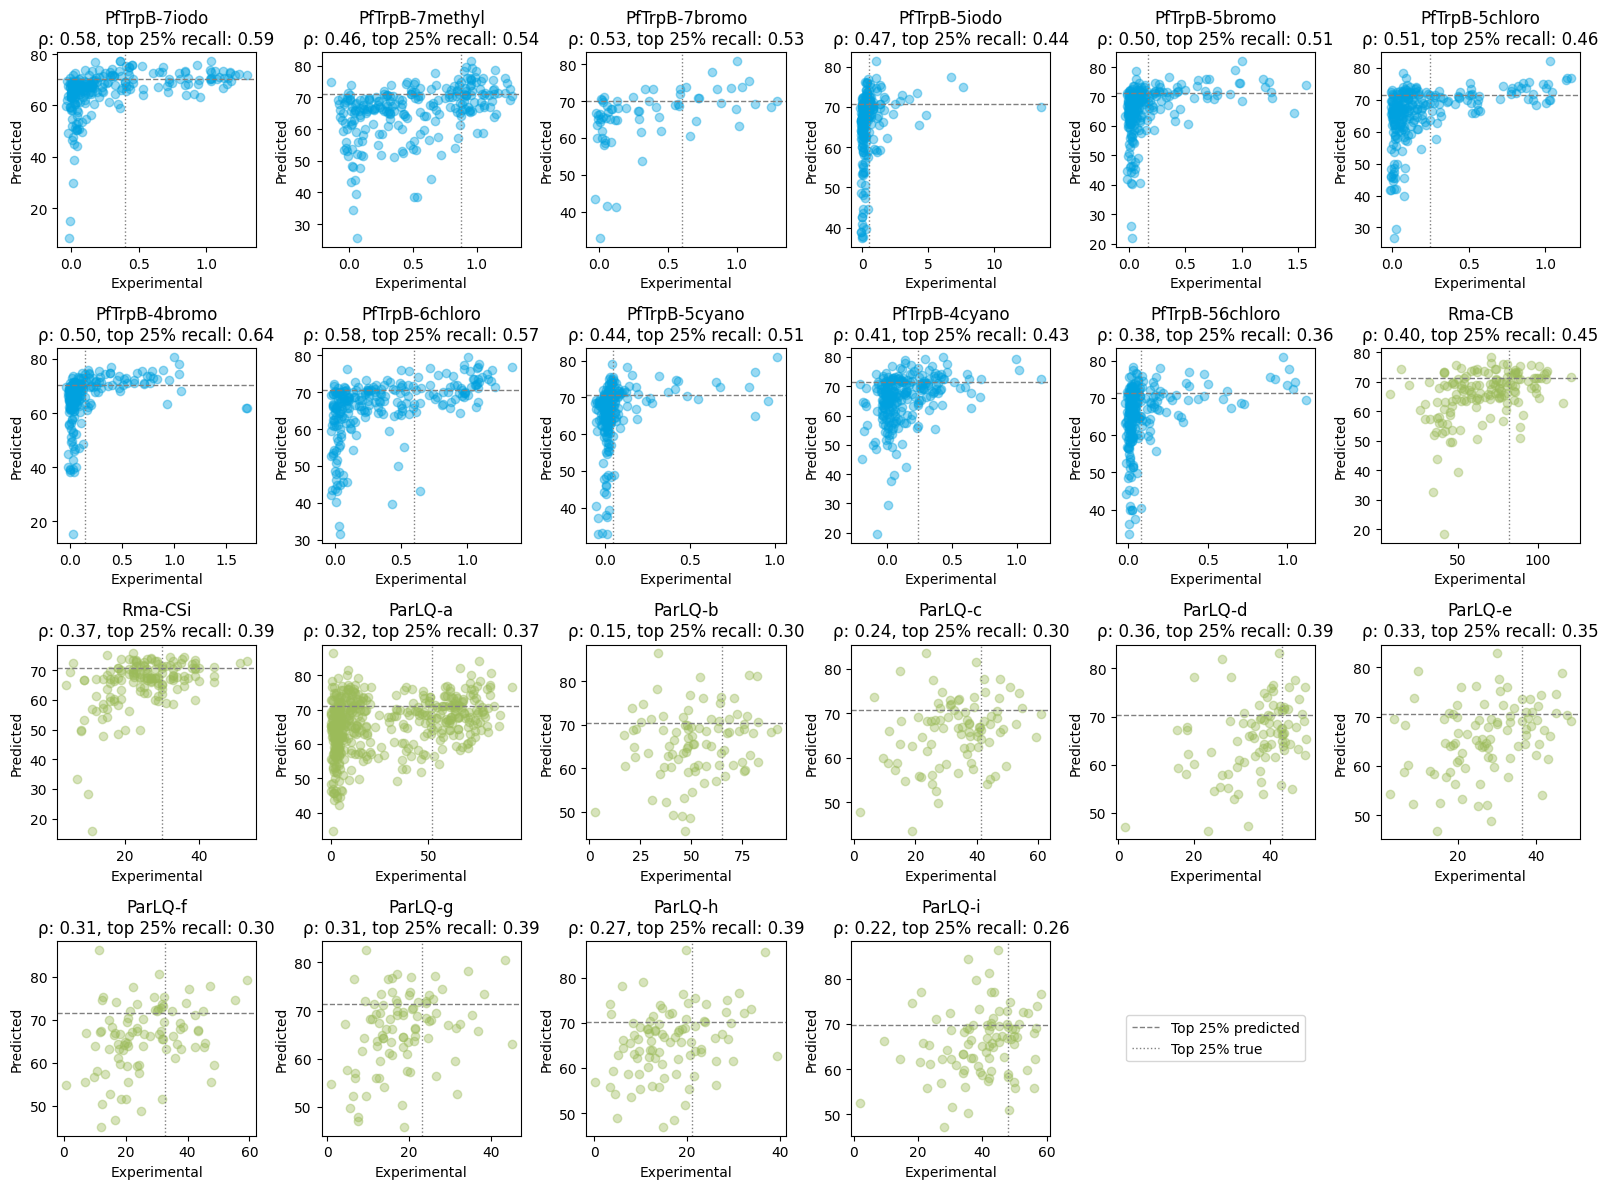

In [35]:
import os
from glob import glob

top = 25

weighted_res = []

# Define grid size (4 rows, 6 columns)
fig, axes = plt.subplots(4, 6, figsize=(16, 12))  # Adjust figure size as needed
axes = axes.flatten()  # Flatten for easy iteration

all_data = [os.path.join("/disk2/fli/REVIVAL2/zs/comb/minimal/", lib + ".csv") for lib in lib_order] # sorted(glob("/disk2/fli/REVIVAL2/zs/comb/minimal/*.csv"))

for i, f in enumerate(all_data):
    df = pd.read_csv(f)

    X = df[["EVmutation", "AF3"]].to_numpy()
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    y = df["fitness"].to_numpy()

    y_all = inference_linear_model(X, intercept, weights)
    rho = spearmanr(y, y_all)[0]
    recall = calc_top_n_percent_recall(y_true=y, y_score=y_all, top_n=top)
    # y_pf = inference_linear_model(X, intercept, weights)
    # y_cb = inference_linear_model(X, intercept, weights)
    # y_csi = inference_linear_model(X, intercept, weights)
    # y_par = inference_linear_model(X, intercept, weights)

    file_name = get_file_name(f)
    if file_name == "ParLQ":
        file_name = "ParLQ-a"
    
    # plot scatter 
    # plt.figure(figsize=(4,4))
    # plt.scatter(y, y_all)
    # plt.xlabel("Experimental")
    # plt.ylabel("Predicted")
    # plt.title(file_name)
    if "TrpB" in file_name:
        c = "#00a1df"
    else:
        c= "#9bbb59"

    # Plot each dataset in its subplot
    ax = axes[i]
    ax.scatter(y, y_all, alpha=0.4, c=c)

    # Compute the top 20% threshold for Y-values (80th percentile)
    top_cutoff_pred = np.percentile(y_all, 100-top)
    top_cutoff_true = np.percentile(y, 100-top)
    
    # Add horizontal line to indicate the top 20% threshold
    axes[i].axhline(top_cutoff_pred, color='gray', linestyle='dashed', linewidth=1, label=f"Top {top}% predicted")
    # Add vertical line to indicate the top 20% threshold
    axes[i].axvline(top_cutoff_true, color='gray', linestyle='dotted', linewidth=1, label=f"Top {top}% true")

    axes[i].set_title(f"{file_name}\nρ: {rho:.2f}, top {top}% recall: {recall:.2f}")
    axes[i].set_xlabel("Experimental")
    axes[i].set_ylabel("Predicted")
    
    # calc rho
    weighted_res.append(
            {
            "Library": file_name,
            "rho": rho,
            f"top{top}": recall
            # "PfTrpB": spearmanr(y, y_pf)[0],
            # "Rma-CB": spearmanr(y, y_cb)[0],
            # "Rma-CSi": spearmanr(y, y_csi)[0],
            # "ParLQ": spearmanr(y, y_par)[0],
        }
    )

for j in range(len(all_data), len(axes)):
    # Hide empty subplots
    ax = axes[j]
    # Clear the empty subplot and use it for the legend
    ax.clear()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)  # Remove frame

# Find the first empty subplot
first_empty_index = len(all_data)  # First empty subplot after all data is plotted

# If there's an empty subplot available, place the legend there
if first_empty_index < len(axes):
    ax_legend = axes[first_empty_index]  # Select the first empty subplot
else:
    ax_legend = axes[len(all_data) - 1]  # If no empty subplot, use last populated one

# Get legend handles and labels from the first non-empty subplot
handles, labels = axes[0].get_legend_handles_labels()



# Add legend to the first empty subplot
ax_legend.legend(handles, labels, loc="center")

# save

# Adjust layout
plt.tight_layout()
plt.savefig(f"figs/scatter/top{top}.svg", dpi=300)

plt.show()

In [94]:
pd.DataFrame(weighted_res)

,Library,All,PfTrpB,Rma-CB,Rma-CSi,ParLQ
0,ParLQ-b,0.152318,0.152318,0.152318,0.152318,0.152318
1,ParLQ-c,0.238025,0.238025,0.238025,0.238025,0.238025
2,ParLQ-d,0.357445,0.357445,0.357445,0.357445,0.357445
3,ParLQ-e,0.331965,0.331965,0.331965,0.331965,0.331965
4,ParLQ-f,0.313030,0.313030,0.313030,0.313030,0.313030
5,ParLQ-g,0.305170,0.305170,0.305170,0.305170,0.305170
6,ParLQ-h,0.265043,0.265043,0.265043,0.265043,0.265043
7,ParLQ-i,0.224671,0.224671,0.224671,0.224671,0.224671
8,ParLQ-a,0.319995,0.319995,0.319995,0.319995,0.319995
9,PfTrpB-4bromo,0.503819,0.503819,0.503819,0.503819,0.503819


In [97]:
pd.DataFrame(weighted_res)[["All"]].mean()

All    0.391732
dtype: float64

In [110]:
pd.DataFrame(weighted_res)[["Library", "All"]].set_index("Library").to_dict()["All"]

{'ParLQ-b': 0.1523184608891614,
 'ParLQ-c': 0.23802451833489488,
 'ParLQ-d': 0.35744545309762704,
 'ParLQ-e': 0.33196499387887807,
 'ParLQ-f': 0.3130300448422614,
 'ParLQ-g': 0.3051704504830828,
 'ParLQ-h': 0.2650432594512944,
 'ParLQ-i': 0.22467132244160679,
 'ParLQ-a': 0.3199954896114968,
 'PfTrpB-4bromo': 0.5038194247236192,
 'PfTrpB-4cyano': 0.405931723877782,
 'PfTrpB-56chloro': 0.3761525463398954,
 'PfTrpB-5bromo': 0.49751637248086983,
 'PfTrpB-5chloro': 0.5090232907443473,
 'PfTrpB-5cyano': 0.43977258138390984,
 'PfTrpB-5iodo': 0.4703739583690546,
 'PfTrpB-6chloro': 0.5777199379565172,
 'PfTrpB-7bromo': 0.5317021032942703,
 'PfTrpB-7iodo': 0.5791796995727267,
 'PfTrpB-7methyl': 0.4557902678234629,
 'Rma-CB': 0.3968486489108766,
 'Rma-CSi': 0.36660699495028093}